In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import mplhep as hep
from scipy.optimize import curve_fit
import pandas as pd

plt.style.use(hep.style.ROOT)

### User Defined

In [54]:
ptrigDF = pd.read_pickle(r'./COSMIC_LG50_HG63_4k_R35.pkl')
df = pd.read_pickle(r'./BEAM_LG50_HG63_8k_R36.pkl')

[68.57919643986679, 67.15253865835835, 68.68214537250188, 75.7679416253515, 70.94602481702833, 67.92390918166444, 68.3857501484857, 67.4278646083262, 73.77346388985585, 79.26801703234754, 64.71152736457984, 72.99210430977251, 84.23320542863898, 80.90292059333449, 78.37966225750384, 74.82264799904033, 70.2580592750309, 64.59282040555564, 71.92536391006126, 65.22561363483436, 66.71665766662169, 64.29350090179828, 65.57444754205984, 62.29541517621482, 60.04205983037791, 71.93741510058472, 62.73420048585435, 64.77299098220338, 62.557559799024176, 64.6450140636057, 56.33265037797929, 63.17071739853773, 76.98047742492595, 69.32690829613267, 71.02080588632536, 70.01653731024241, 68.39524157970612, 72.55843922874439, 70.368876310409, 78.69598757280623]


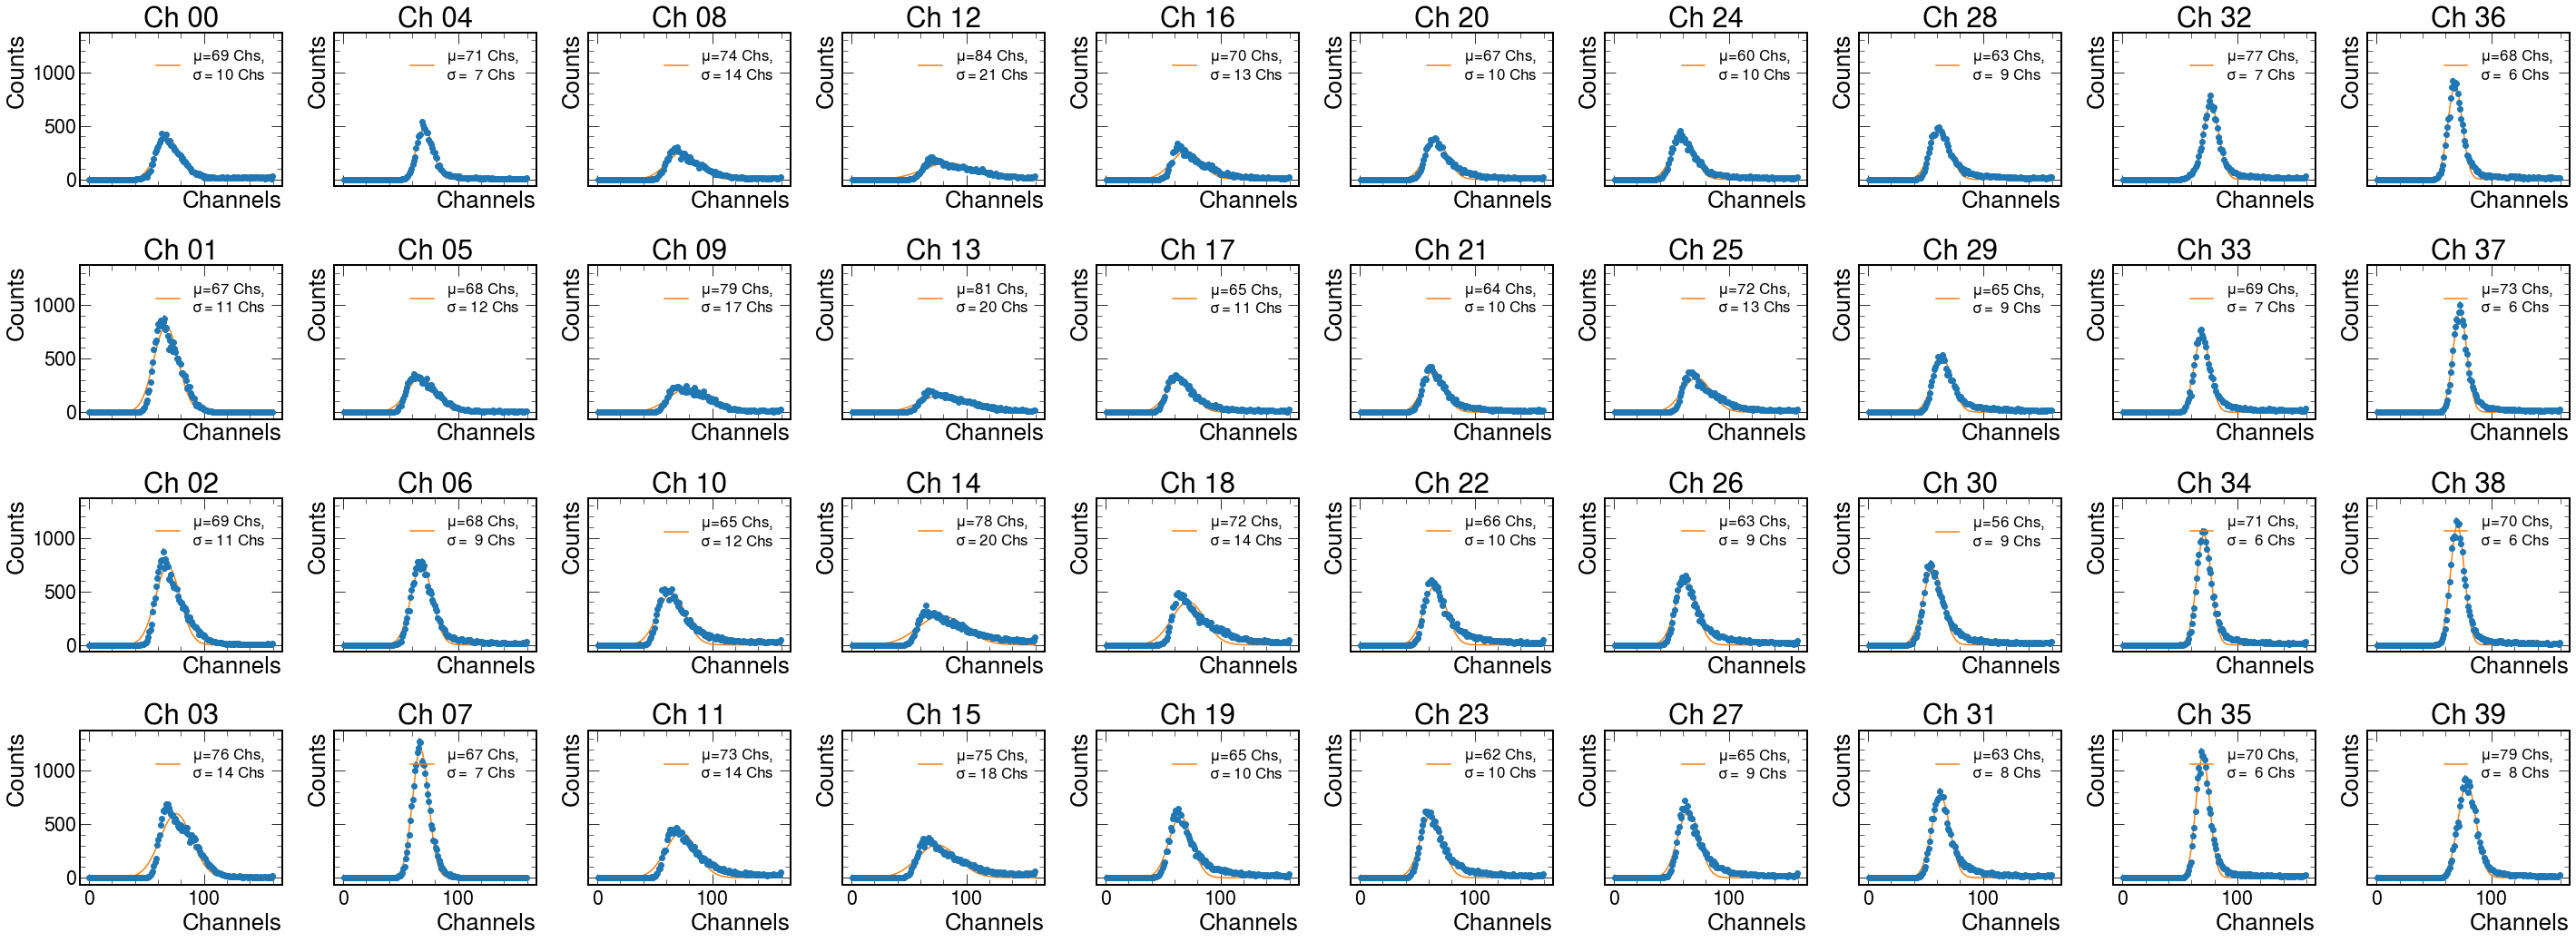

In [59]:
fig, axs=plt.subplots(4, 10, figsize=(0.5*len(ptrigDF.columns),15),sharey=True,sharex=True)
i=0
pedMeans = []
pedStds = []

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


for i in range(round(len(ptrigDF.columns)/2)):
    plt.sca(axs[i%4][i//4])
    
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    hist, bin_edges = np.histogram(np.array(getattr(ptrigDF,"Ch_{}_LG".format("{:02d}".format(i)))),range=(0,160),bins=160)
   
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    
    
    p0 = [200., 65., 3.]
    coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
    hist_fit = gauss(np.linspace(0,160,5000), *coeff)
    plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
    plt.plot(np.linspace(0,160,5000), hist_fit, label='$\mu$=%2.0f Chs, \n$\sigma=$%2.0f Chs'%(coeff[1],abs(coeff[2])))
 
    pedMeans.append(coeff[1])

    pedStds.append(abs(coeff[2]))
    #print('Resolution = %2.1f '%(100*coeff[2]/coeff[1]))

    plt.xlabel("Channels")
    plt.ylabel("Counts")
  
    plt.title("Ch {}".format("{:02d}".format(i)))
    plt.tight_layout()
    plt.legend(fontsize=17,loc='upper right')
print(pedMeans)

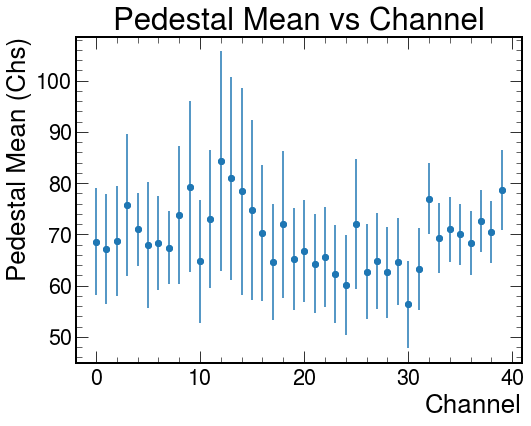

In [5]:
fig = plt.figure( figsize=(8, 6))
plt.scatter(range(0,40),pedMeans)
plt.xlabel('Channel')
plt.ylabel('Pedestal Mean (Chs)')
plt.title("Pedestal Mean vs Channel")
plt.errorbar(range(0,40), pedMeans, yerr=pedStds, fmt="o")


#plt.ylim(0,6)
plt.show()

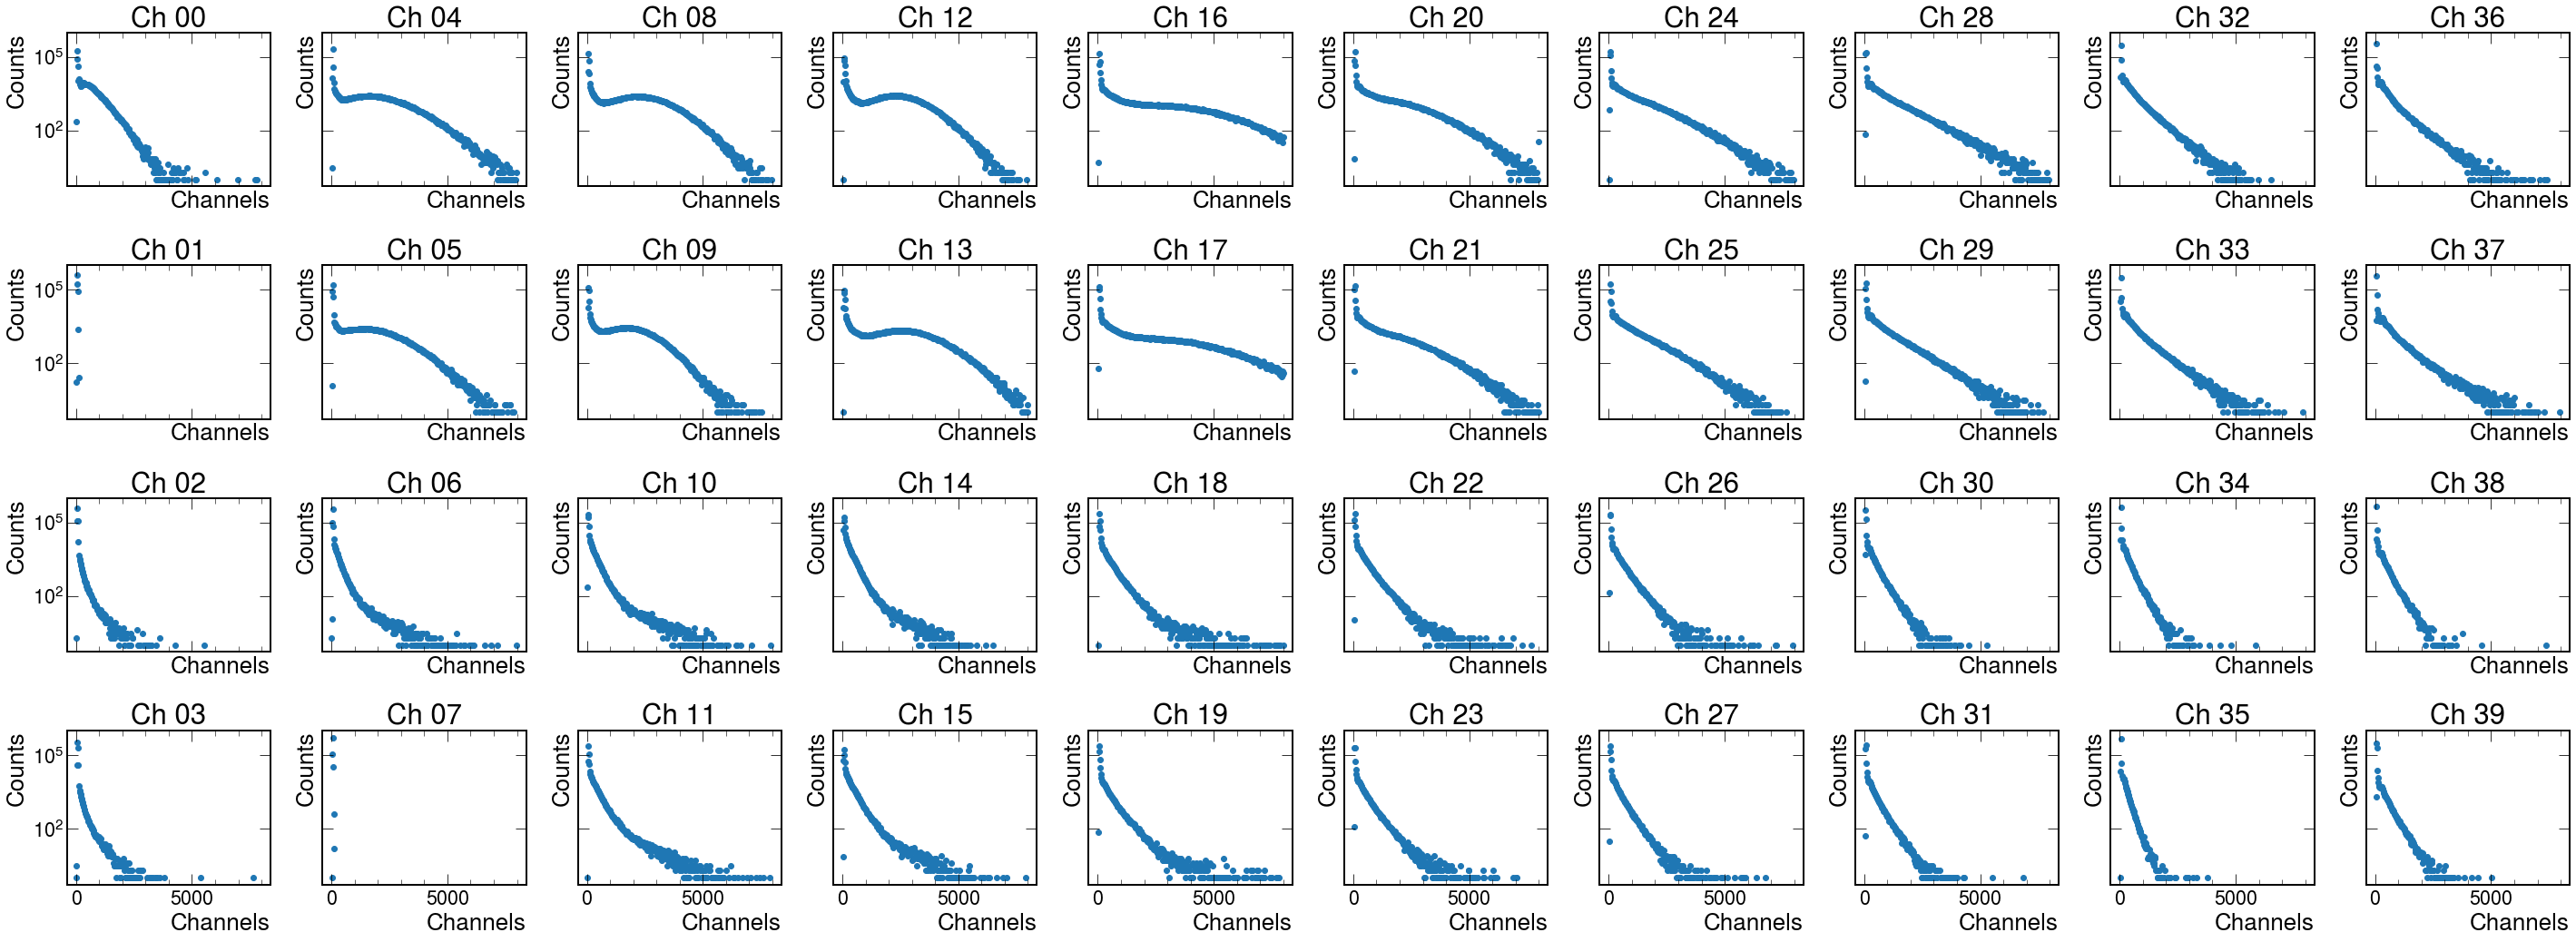

In [63]:
fig, axs=plt.subplots(4, 10, figsize=(0.5*len(ptrigDF.columns),15),sharey=True,sharex=True)
i=0

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


for i in range(round(len(ptrigDF.columns)/2)):

    plt.sca(axs[i%4][i//4])
    
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    
    cut_primary = df["Ch_{}_LG".format("{:02d}".format(i))] >= pedMeans[i] + 3*pedStds[i]
    
    hist, bin_edges = np.histogram(np.array(getattr(df,"Ch_{}_LG".format("{:02d}".format(i)))),range=(0,8000),bins=400)
   
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    plt.scatter(bin_centres, hist)
    
    #p0 = [200., 65., 3.]
    #coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
    #hist_fit = gauss(np.linspace(0,4000,5000), *coeff)
    #plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
    #plt.plot(np.linspace(0,4000,5000), hist_fit, label='$\mu$=%2.0f Chs, \n$\sigma=$%2.0f Chs'%(coeff[1],abs(coeff[2])))

    plt.xlabel("Channels")
    plt.ylabel("Counts")
  
    plt.title("Ch {}".format("{:02d}".format(i)))
    plt.tight_layout()
    #plt.legend(fontsize=17,loc='upper right')
    plt.yscale("log") 


In [6]:
fig = plt.figure( figsize=(8, 6))
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
#plt.rcParams['savefig.bbox']='tight'
print(round((max(timeStamps)-min(timeStamps))/1000000))
hist, bin_edges = np.histogram(np.array(timeStamps),bins=round((max(timeStamps)-min(timeStamps))/1000000), range=(min(timeStamps),max(timeStamps)))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')

#plt.plot(np.linspace(0,1000,1000), label="Ch 4")

plt.xlabel('Time        ')
plt.ylabel('Rate')
plt.title("Event Times")
print(min(timeStamps))
print(max(timeStamps))
print(len(timeStamps))

NameError: name 'timeStamps' is not defined

<Figure size 576x432 with 0 Axes>

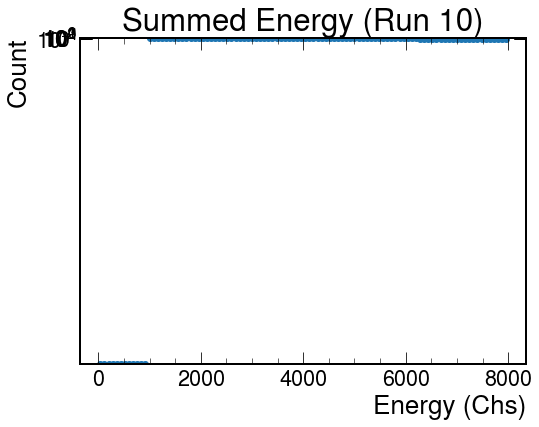

In [61]:
fig = plt.figure( figsize=(8, 6))
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
#print(totAllChs)
ch = 4
maxE = 8000
cut_primary = df["Ch_{}_LG".format("{:02d}".format(ch))] >= 1000


hist, bin_edges = np.histogram(np.array(getattr(df,"Ch_{}_LG".format("{:02d}".format(ch))))[cut_primary],bins=100, range=(0,maxE))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

#p0 = [15000., 70, 20.]
#coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
#hist_fit = gauss(np.linspace(0,maxE,5000), *coeff)
#plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
#plt.plot(np.linspace(0,maxE,5000), hist_fit, label='$\mu$=%2.0f Chs, \n$\sigma=$%2.0f Chs'%(coeff[1],abs(coeff[2])))
#plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
plt.scatter(bin_centres, hist)
plt.xlabel('Energy (Chs)')
plt.ylabel('Count')
plt.ylim(0,25000)
plt.title("Summed Energy (Run 10)")
plt.legend(fontsize=17,loc='upper right')






In [32]:
fig = plt.figure( figsize=(8, 6))
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import numpy as np

totElayer = [[],[],[],[],[],[],[],[],[],[]]
totAllChs = []
selectChs = []
multiplier = 1
#1.7

for evtn in range(10000): 
    if(1 > 0):
        layers = [0,0,0,0,0,0,0,0,0,0]
        totEn = 0
        for ch in range(0,40):
            if ch <= 15:
                multiplier = 1.7
            else:
                multiplier = 1
            if getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] >= (pedMeans[ch] + 3*pedStds[ch]):
                totEn += (getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch])*multiplier
        totAllChs.append(totEn)
        
        for ch in range(0,4):
            if getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] >= (pedMeans[ch] + 3*pedStds[ch]):
                layers[0] += (getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch])*multiplier
        totElayer[0].append(layers[0])
        for ch in range(4,8):
            if getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] >= (pedMeans[ch] + 3*pedStds[ch]):
                layers[1] += (getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch])*multiplier
        totElayer[1].append(layers[1])
        for ch in range(8,12):
            if getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] >= (pedMeans[ch] + 3*pedStds[ch]):
                layers[2] += (getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch])*multiplier
        totElayer[2].append(layers[2])
        chsum = 0
        for ch in range(12,16):
            if getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] >= (pedMeans[ch] + 3*pedStds[ch]):
                layers[3] += (getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch])*multiplier
        totElayer[3].append(layers[3])
        for ch in range(16,20):
            if getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] >= (pedMeans[ch] + 3*pedStds[ch]):
                layers[4] += getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch]
        totElayer[4].append(layers[4])
        for ch in range(20,24):
            if getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] >= (pedMeans[ch] + 3*pedStds[ch]):
                layers[5] += getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch]
        totElayer[5].append(layers[5])
        chsum = 0
        for ch in range(24,28):
            if getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] >= (pedMeans[ch] + 3*pedStds[ch]):
                layers[6] += getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch]
        totElayer[6].append(layers[6])
        chsum = 0
        for ch in range(28,32):
            if getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] >= (pedMeans[ch] + 3*pedStds[ch]):
                layers[7] += getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch]
        totElayer[7].append(layers[7])
        chsum = 0
        for ch in range(32,36):
            if getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] >= (pedMeans[ch] + 3*pedStds[ch]):
                layers[8] += getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch]
        totElayer[8].append(layers[8])
        chsum = 0
        for ch in range(36,40):
            if getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] >= (pedMeans[ch] + 3*pedStds[ch]):
                layers[9] += getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch]
        totElayer[9].append(layers[9])
    
        if(layers[0] >= 0 and layers[1] >= 0 and layers[2] >= 0 and layers[3] >= 0 and layers[4] > 10 and layers[5] > 10 and layers[6] > 10 and layers[7] > 10 and layers[8] > 10):
            chsum = 0
            for ch in range(0,36):
                if getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] >= (pedMeans[ch] + 3*pedStds[ch]):
                    chsum += getattr(df,"Ch_{}_LG".format("{:02d}".format(ch)))[evtn] - pedMeans[ch]
            selectChs.append(chsum)
    


KeyboardInterrupt: 

<Figure size 576x432 with 0 Axes>

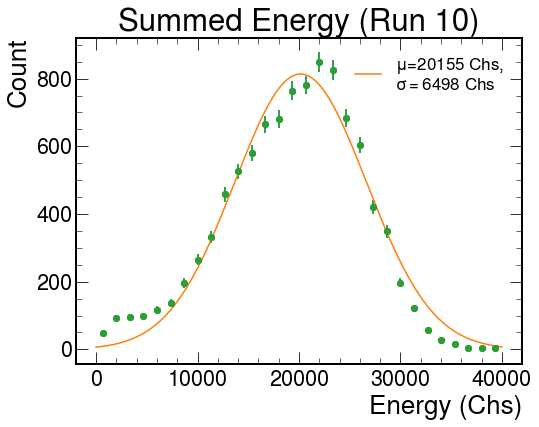

In [10]:
fig = plt.figure( figsize=(8, 6))
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
#print(totAllChs)
maxE = 40000
hist, bin_edges = np.histogram(np.array(totAllChs),bins=30, range=(0,maxE))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

p0 = [50., 1500., 1000.]
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
hist_fit = gauss(np.linspace(0,maxE,5000), *coeff)
plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
plt.plot(np.linspace(0,maxE,5000), hist_fit, label='$\mu$=%2.0f Chs, \n$\sigma=$%2.0f Chs'%(coeff[1],abs(coeff[2])))
plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
plt.xlabel('Energy (Chs)')
plt.ylabel('Count')
plt.title("Summed Energy (Run 10)")
plt.legend(fontsize=17,loc='upper right')

434.5191575375741
1078.3200808966633
1072.6148587099176
1195.3717080047056
1925.0689495498211
1206.436251020475
969.9241287163246
880.3884529696546
538.2670000144728
539.3344430661505


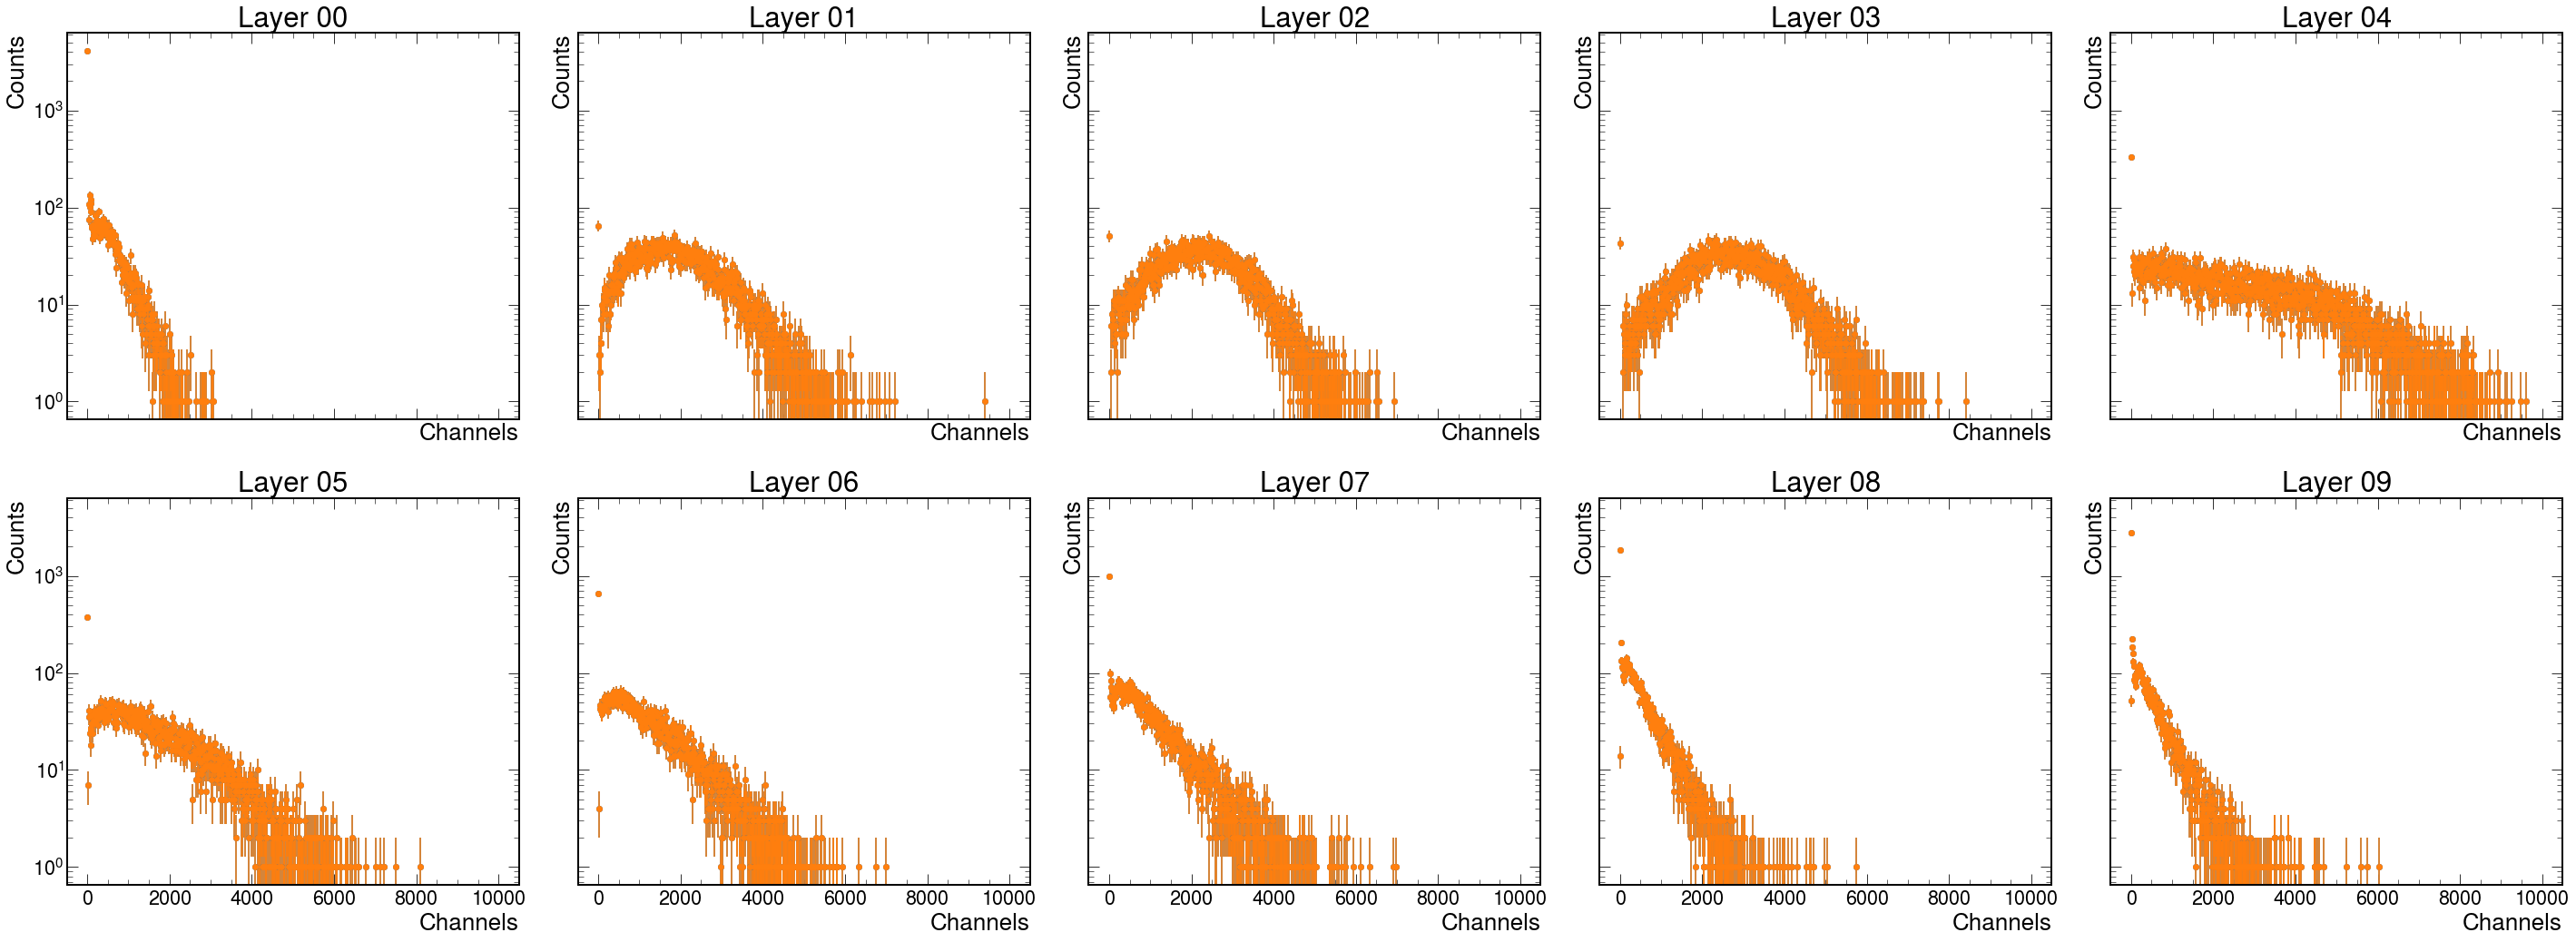

In [11]:
import statistics
fig, axs=plt.subplots(2, 5, figsize=(0.5*len(df.columns),15),sharey=True,sharex=True)

layerMeans = []
layerErr = []
for i in range(10):
    if i <= 4:
        plt.sca(axs[0][i])
    else:
        plt.sca(axs[1][i-5])
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    
    
    
    hist, bin_edges = np.histogram(np.array(totElayer[i]),range=(0,10000),bins=1000)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    
    #print(sum(totElayer[i])/len(totElayer[i]))
    #p0 = [50,sum(totElayer[i])/len(totElayer[i]), 50.]
    #coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)
    #hist_fit = gauss(np.linspace(10,700,5000), *coeff)
    plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
    #plt.plot(np.linspace(10,700,5000), hist_fit, label='$\mu$=%2.0f Chs, \n$\sigma=$%2.0f Chs'%(coeff[1],abs(coeff[2])))
    #layerMeans.append(coeff[1])
    #layerErr.append(abs(coeff[2]))
    layerMeans.append(statistics.median(totElayer[i]))
    layerErr.append(statistics.pstdev(totElayer[i]))
    print(statistics.pstdev(totElayer[i]))
    #plt.ylim(0,100)
    plt.errorbar(bin_centres, y=hist, yerr=np.sqrt(hist),fmt='o')
    plt.xlabel("Channels")
    plt.ylabel("Counts")
    plt.yscale("log") 
    plt.title("Layer {}".format("{:02d}".format(i)))
    #plt.legend(fontsize=17,loc='upper right')
    plt.tight_layout()    

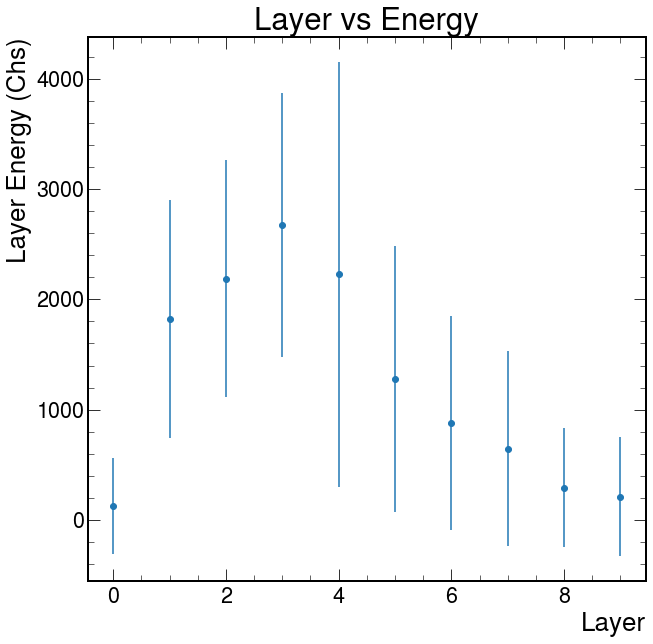

In [12]:
#plt.scatter(range(0,10),layerMeans)
plt.errorbar(range(0,10), layerMeans, yerr=layerErr, fmt="o")

plt.xlabel('Layer')
plt.ylabel('Layer Energy (Chs)')
plt.title("Layer vs Energy")
#plt.ylim(0,6)
plt.show()